# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 2/3:  Implementacja propagacji wstecznej błędu (2 tygodnie, 4 punkty)

W ramach tego laboratorium trzeba zaimplementować uczenie sieci neuronowej propagacją wsteczną błędu.


Aby sprawdzić implementację, należy wykonać uczenie na prostych danych do uczenia dostarczonych na
zajęciach. Następnie należy zaimplementować metodę wizualizacji wartości wag sieci w kolejnych iteracjach
i, w przypadku gdy nie udaje się nauczyć sieci, spróbować wykorzystać te wizualizacje do ustalenia
przyczyny problemu. Zaimplementować wersję z aktualizacją wag po prezentacji wszystkich wzorców i
wersję z aktualizacją po prezentacji kolejnych porcji (batch). Porównać szybkość uczenia dla każdego z
wariantów.

Inicjować wagi z rozkładu jednostajnego na przedziale [0,1]. Opcjonalnie zaimplementować inną metodą
inicjowania wag. Albo metodę He albo Xavier.

Przetestować uczenie sieci na następujących zbiorach (w nawiasach wartość MSE, aby otrzymać 4 punkty):
- square-simple (jeśli sieć nie jest w stanie się nauczyć tej funkcji to coś jest bardzo źle zrobione, MSE:
4),
- steps-small (MSE: 4),
- multimodal-large (MSE: 40).
(Wartości MSE liczone na nieznormalizowanych danych)

#### TODO:

- ~~change the weights initialization to uniform(0,1), Xavier or He~~
- implemnent cost function for MSE
- ~~implement gradients for activation functions~~
- ~~implement backpropagation without bias~~
- ~~implement backpropagation with bias~~
- implement batch learning
- implement visualization
- implement visualization for batch learning
- compare learning speed with and without batch learning


In [17]:
from MultiLayerPerceptron import NeuralNetwork, Layer
from itertools import chain
import pandas as pd
import numpy as np

def mse(real, pred):
    if type(real[0]) == list:
        real2 = list(chain.from_iterable(real))
    else:
        real2 = real
    if type(pred[0]) == list:
        pred2 = list(chain.from_iterable(pred))
    else:
        pred2 = pred
    return np.square(np.subtract(real2,pred2)).mean() 

## Dataset 1: Square Simple

In [18]:
df_train = pd.read_csv('data/regression/square-simple-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/square-simple-test.csv').set_index("Unnamed: 0")
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x           y
Unnamed: 0                      
1          -0.171543 -127.351580
2           0.025201 -129.942844
3          -1.368991   38.672367
4           1.907390  197.432191
5           0.011129 -129.988852


#### Model 1: 1 hidden layer with 5 neurons

In [19]:
net1_1_5_1 = NeuralNetwork(weights_randomizer='uniform')
net1_1_5_1.add(Layer(neurons_count=1, add_bias=True))
net1_1_5_1.add(Layer(neurons_count=5, activation_fun="sigmoid", add_bias=True))
net1_1_5_1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))
# print(net1_1_5_1)

In [20]:
result = net1_1_5_1.train(x_train, y_train,y_train,y_test, epochs=2000, learning_rate=0.0001, batch_size=32, verbose=True)
y_train_pred_1 = net1_1_5_1.predict(x_train)
y_train_pred_1 = list(chain.from_iterable(y_train_pred_1))
mse_1_2 = mse(y_train_pred_1, y_train)
print(f"MSE train is {round(mse_1_2,2)}")

import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="green")
plt.scatter(x_train, y_train_pred_1, color="red")
plt.show()

Epoch: 1 / 2000 , MSE train: 8533.208963810168, MSE test: 8889.44103956378


IndexError: index 4 is out of bounds for axis 0 with size 4

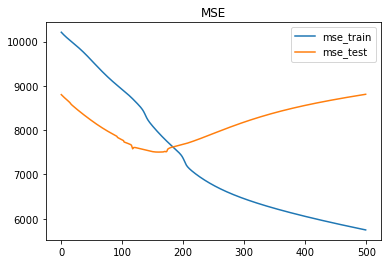

In [12]:
plt.plot(result["mse_train"],label="mse_train")
plt.plot(result["mse_test"],label="mse_test")
plt.title("MSE")
plt.legend()
plt.show()

MSE test is 4016.69


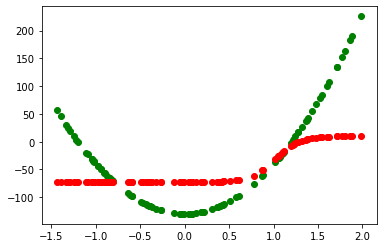

In [5]:
y_test_pred_1 = net1_1_5_1.predict(x_test)
y_test_pred_1 = list(chain.from_iterable(y_test_pred_1))
mse_1_2 = mse(y_test_pred_1, y_test)
print(f"MSE test is {round(mse_1_2,2)}")

import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, color="green")
plt.scatter(x_test, y_test_pred_1, color="red")
plt.show()

## Dataset 2: Steps Small

In [123]:
df_train = pd.read_csv('data/regression/steps-large-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/steps-large-test.csv').set_index("Unnamed: 0")
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [y for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [y for y in df_test.loc[:,"y"]]

                   x   y
Unnamed: 0              
1          -1.481354 -80
2           1.033264  80
3          -0.076403   0
4          -1.419785 -80
5          -0.108398   0


#### Model 1: 2 hidden layers with 5 neurons each

In [124]:
net3_1_5_1 = NeuralNetwork()
net3_1_5_1.add(Layer(neurons_count=1, add_bias=True))
net3_1_5_1.add(Layer(neurons_count=5, activation_fun='sigmoid', add_bias=True))
net3_1_5_1.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

b = -250
a = 500
c = -80
d = 80
e = 80/2

net3_1_5_1.set_weights([\
        np.array([[-250,-750,-750,250,250],\
                [501,499.95,499.95,500.2,500.2]]),\
        np.array([[-80],\
                [80],\
                [40],\
                [40],\
                [40],\
                [40]])])
print(net3_1_5_1)

Neural network layers:
	Layer 1: Layer has 2 neurons (including 1 bias neuron) and activation function is 'linear function'
	Layer 2: Layer has 6 neurons (including 1 bias neuron) and activation function is 'sigmoid function'
	Layer 3: Layer has 1 neurons (with no bias neuron) and activation function is 'linear function'
Neural network weights:
	Weights 1: (2, 5) (input, output)
[[-250.   -750.   -750.    250.    250.  ]
 [ 501.    499.95  499.95  500.2   500.2 ]]
	Weights 2: (6, 1) (input, output)
[[-80]
 [ 80]
 [ 40]
 [ 40]
 [ 40]
 [ 40]]



In [125]:
y_train_pred_2 = net3_1_5_1.predict(x_train)
y_train_pred_2 = list(chain.from_iterable(y_train_pred_2))
mse_1_2 = mse(y_train_pred_2, y_train)
print(f"MSE train is {round(mse_1_2,2)}")

MSE train is 4.14


In [126]:
y_test_pred_2 = net3_1_5_1.predict(x_test)
y_test_pred_2 = list(chain.from_iterable(y_test_pred_2))
mse_1_2 = mse(y_test_pred_2, y_test)
print(f"MSE test is {round(mse_1_2,2)}")

MSE test is 3.58


## Multimodal Large

# TODO

#### Results

MSE for the `square simple` dataset is:  
- train: 2.46
- test: 2.26

MSE for the `steps large` dataset is:  
- train: 4.14
- test: 3.58


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96d48dca-8d08-48ed-b693-a040059620ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>